In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

% matplotlib inline

In [5]:
entrada = pd.read_csv('saidaPreProcessamento.csv',header = 0, sep=',',encoding='utf-8',index_col=0)

entrada.head()
entrada['Nome'] = entrada.Nome.astype('category')

entrada['Nota'] = entrada.iloc[:,1:5].mean(axis=1)
entrada.head()
entrada.sort_values(by='Nota',inplace=True,ascending=False)
entrada.reset_index(inplace=True,drop=True)
entrada.head()

,Nome,localizacao,quartos,facilidades,cafe_da_manha,comida,Academia,Acesso direto à praia,Animais permitidos,Bar na beira da Piscina,...,Canais de TV via satélite,Cofre no quarto,Cozinha quitinete,Espelho de aumento,Ferro e tábua de passar,Mesa de trabalho,Secador,Telefone,TV LCD,Nota
0,Radisson Recife,92.0,84.0,83.0,74.83,76.00,1,0,0,0,...,0,1,0,0,1,1,1,1,1,83.4575
1,Transamérica Prestige Beach Class International,89.0,84.0,85.0,74.83,77.05,1,0,0,0,...,0,1,0,0,1,1,1,0,0,83.2075
2,Hotel Atlante Plaza,91.0,81.0,81.0,78.00,76.00,1,0,1,1,...,0,1,0,0,0,1,1,1,0,82.7500
3,Courtyard Recife Boa Viagem,85.0,85.0,85.0,74.83,77.00,1,0,0,0,...,1,1,0,0,1,1,1,1,0,82.4575
4,Nobile Beach Class Executive,88.0,83.0,84.0,72.00,80.00,1,0,0,1,...,0,1,0,0,1,1,1,1,0,81.7500


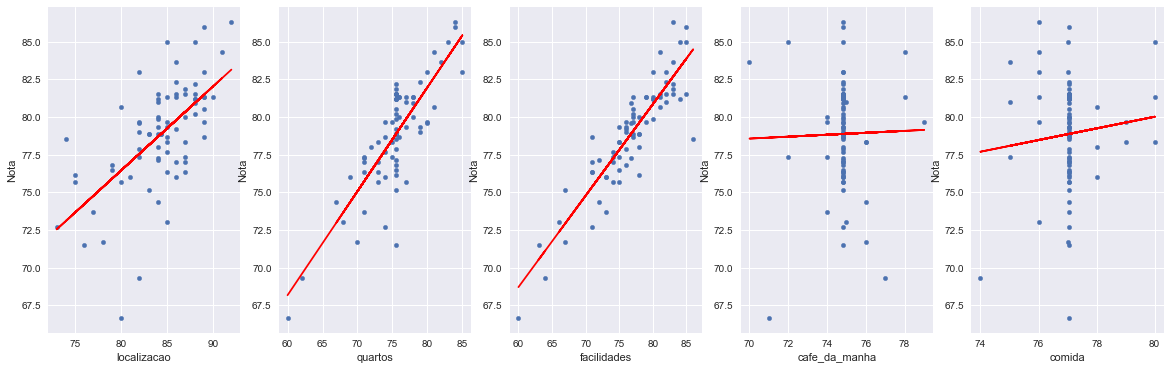

In [4]:
from scipy.stats import linregress

figs, axes = plt.subplots(1,5,figsize=(20,6))
entrada[['localizacao','Nota']].plot.scatter(x='localizacao',y='Nota',ax=axes[0])
entrada[['quartos','Nota']].plot.scatter(x='quartos',y='Nota',ax=axes[1])
entrada[['facilidades','Nota']].plot.scatter(x='facilidades',y='Nota',ax=axes[2])
entrada[['cafe_da_manha','Nota']].plot.scatter(x='cafe_da_manha',y='Nota',ax=axes[3])
entrada[['comida','Nota']].plot.scatter(x='comida',y='Nota',ax=axes[4])

y = entrada.Nota.values

xLocal = entrada.localizacao.values.copy()
xQuart = entrada.quartos.values.copy()
xFacil = entrada.facilidades.values.copy()
xCafe = entrada.cafe_da_manha.values.copy()
xComida = entrada.comida.values.copy()

modelLocal = linregress(xLocal,y)
modelQuartos = linregress(xQuart,y)
modelFacil = linregress(xFacil,y)
modelCafe = linregress(xCafe,y)
modelComida = linregress(xComida,y)

##Plot das regressões obtidas com o scipy nos dados coletados
axes[0].plot(entrada.localizacao,entrada.localizacao.map(lambda x: modelLocal.slope*x + modelLocal.intercept),color='red')
axes[1].plot(entrada.quartos,entrada.quartos.map(lambda x: modelQuartos.slope*x + modelQuartos.intercept),color='red')
axes[2].plot(entrada.facilidades,entrada.facilidades.map(lambda x: modelFacil.slope*x + modelFacil.intercept),color='red')
axes[3].plot(entrada.cafe_da_manha,entrada.cafe_da_manha.map(lambda x: modelCafe.slope*x + modelCafe.intercept),color='red')
axes[4].plot(entrada.comida,entrada.comida.map(lambda x: modelComida.slope*x + modelComida.intercept),color='red')

#axes.plot
#ax.plot(ads.TV,ads.TV.map(lambda x: b1*x+b0),color='red')